# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
from numpy import sqrt, sin, cos, arcsin, arccos, radians, abs

# Import data

In [2]:
missing_data = pd.read_csv('./missing_data.csv')
warehouses_data = pd.read_csv('./warehouses.csv')

# Check for null

In [82]:
missing_data.isna().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                10
dtype: int64

In [83]:
labels = missing_data.columns
for count in range(len(labels)):
        print('NaN index check list of {}:\n{}'.format(labels[count], [i for i in range(len(missing_data)) if missing_data.loc[:,labels[count]].isnull()[i]]))

NaN index check list of order_id:
[]
NaN index check list of customer_id:
[]
NaN index check list of date:
[]
NaN index check list of nearest_warehouse:
[]
NaN index check list of shopping_cart:
[]
NaN index check list of order_price:
[]
NaN index check list of delivery_charges:
[]
NaN index check list of customer_lat:
[]
NaN index check list of customer_long:
[]
NaN index check list of coupon_discount:
[]
NaN index check list of order_total:
[]
NaN index check list of season:
[]
NaN index check list of is_expedited_delivery:
[]
NaN index check list of distance_to_nearest_warehouse:
[]
NaN index check list of latest_customer_review:
[]
NaN index check list of is_happy_customer:
[20, 22, 92, 129, 141, 179, 250, 303, 305, 488]


# Check for Order ID

In [5]:
print(f'Order id is unique: {missing_data.order_id.is_unique}')

Order id is unique: True


# Check for Customer ID

In [6]:
print(f'Customer id is unique: {missing_data.customer_id.is_unique}')

Customer id is unique: False


In [7]:
missing_data['customer_id'].unique

<bound method Series.unique of 0      ID0289597187
1      ID1668523020
2      ID0370751503
3      ID0634774947
4      ID3313210924
           ...     
495    ID0711745634
496    ID3208518274
497    ID0589449505
498    ID6167357842
499    ID0634783923
Name: customer_id, Length: 500, dtype: object>

# Check for Date

In [8]:
error_date_index = [i for i in range(len(missing_data)) if not missing_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[]


In [9]:
missing_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                 object
dtype: object

In [84]:
missing_data['date'] = pd.to_datetime(missing_data['date'])

In [11]:
missing_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                 object
dtype: object

# Check for Nearest warehouse

In [12]:
print(f'Nearest warehouse is unique: {missing_data.nearest_warehouse.is_unique}')

Nearest warehouse is unique: False


In [13]:
missing_data['nearest_warehouse'].unique()

array(['Thompson', 'Bakers', 'Nickolson', nan], dtype=object)

In [14]:
print(f"Number of null: {missing_data['nearest_warehouse'].isnull().sum()}")

Number of null: 10


In [15]:
nearest_warehouse_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'nearest_warehouse'].isna()[i]]
print(nearest_warehouse_nan_checklist)

[7, 16, 105, 219, 236, 247, 251, 292, 295, 416]


In [16]:
for i in nearest_warehouse_nan_checklist:
    [lat, lon] = missing_data.loc[i, ['customer_lat', 'customer_long']]
    distance = [np.arccos(np.sin(np.radians(lat))*np.sin(np.radians(warehouses_data.iloc[i,1])) 
                + np.cos(np.radians(lat))*np.cos(np.radians(warehouses_data.iloc[i,1]))*np.cos(np.radians(warehouses_data.iloc[i,2] - lon)))*6371 for i in range(3)]
    missing_data.loc[i, 'nearest_warehouse'] = warehouses_data.iloc[distance.index(min(distance)), 0]

In [17]:
print(f"Number of null: {missing_data['nearest_warehouse'].isnull().sum()}")

Number of null: 0


# Check for Distance to nearest warehouse

In [18]:
missing_data['distance_to_nearest_warehouse'].describe()

count    490.000000
mean       1.077335
std        0.509914
min        0.054900
25%        0.723625
50%        1.043350
75%        1.389525
max        3.138800
Name: distance_to_nearest_warehouse, dtype: float64

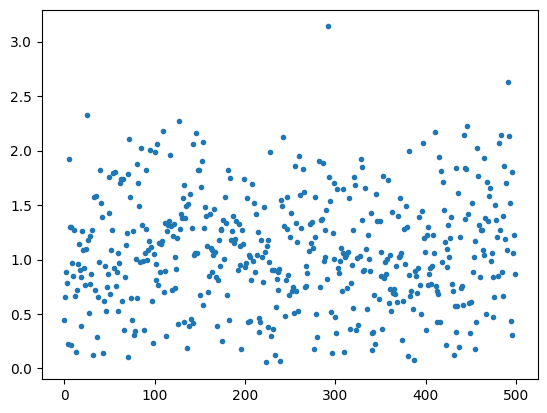

In [19]:
plt.plot(missing_data['distance_to_nearest_warehouse'], '.')

In [20]:
print(f"Number of null value: {missing_data['distance_to_nearest_warehouse'].isnull().sum()}")

Number of null value: 10


In [21]:
distance_to_nearest_warehouse_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'distance_to_nearest_warehouse'].isna()[i]]
print(distance_to_nearest_warehouse_nan_checklist)

[39, 184, 191, 263, 270, 281, 326, 347, 385, 392]


In [22]:
for i in distance_to_nearest_warehouse_nan_checklist:
    [lat1, lon1] = missing_data.loc[i, ['customer_lat', 'customer_long']]
    [lat2, lon2] = warehouses_data.loc[warehouses_data.loc[:, 'names'].to_list().index(missing_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = round(2*6371*np.arcsin(sqrt(np.sin(np.radians((lat1 - lat2)/2))**2 
                     + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(np.radians((lon1-lon2)/2))**2)),4)
    missing_data.loc[i, 'distance_to_nearest_warehouse'] = distance

In [23]:
print(f"Number of null value: {missing_data['distance_to_nearest_warehouse'].isnull().sum()}")

Number of null value: 0


# Check for Order price

In [24]:
missing_data['order_price'].describe()

count      490.000000
mean     13217.867347
std       7552.951453
min        580.000000
25%       7140.000000
50%      12180.000000
75%      18327.500000
max      37300.000000
Name: order_price, dtype: float64

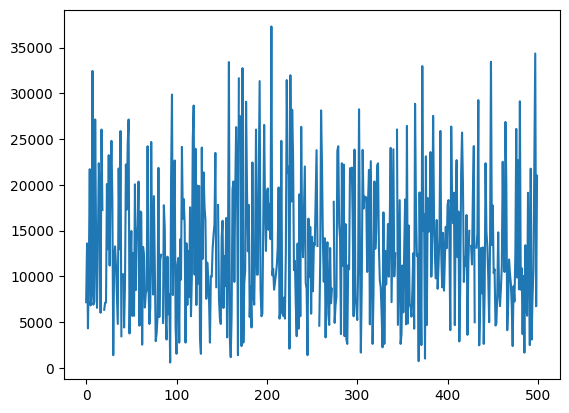

In [25]:
plt.plot(missing_data['order_price'])

In [26]:
print(f"Number of null value: {missing_data['order_price'].isnull().sum()}")

Number of null value: 10


In [27]:
order_price_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'order_price'].isna()[i]]
print(order_price_nan_checklist)

[19, 40, 84, 145, 170, 257, 273, 343, 425, 431]


In [28]:
for i in order_price_nan_checklist:
    order_price = ((missing_data.loc[i, 'order_total'] - missing_data.loc[i, 'delivery_charges'])*100)/(100 - missing_data.loc[i, 'coupon_discount'])
    missing_data.loc[i, 'order_price'] = order_price
    print(i, order_price)

19 13625.0
40 31385.0
84 21210.0
145 16710.0
170 17250.0
257 4680.0
273 34660.0
343 14630.0
425 4685.0
431 32215.0


In [29]:
print(f"Number of null value: {missing_data['order_price'].isnull().sum()}")

Number of null value: 0


# Check for Order total

In [30]:
missing_data['order_total'].describe()

count      490.000000
mean     11939.841020
std       7032.605471
min        568.640000
25%       6486.542500
50%      10756.615000
75%      16315.555000
max      37362.470000
Name: order_total, dtype: float64

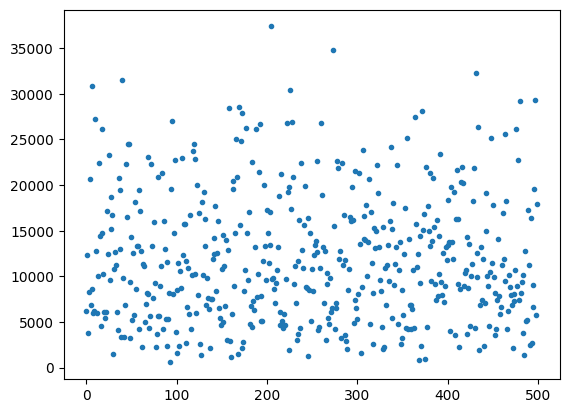

In [90]:
plt.plot(missing_data['order_total'], '.')

In [32]:
print(f"Number of null value: {missing_data['order_total'].isnull().sum()}")

Number of null value: 10


In [33]:
order_total_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'order_total'].isna()[i]]
print(order_total_nan_checklist)

[26, 73, 131, 202, 210, 248, 259, 345, 430, 480]


In [34]:
for i in order_total_nan_checklist:
    order_total = missing_data.loc[i, 'order_price']*(1 - missing_data.loc[i, 'coupon_discount']/100) + missing_data.loc[i, 'delivery_charges']
    missing_data.loc[i, 'order_total'] = order_total
    print(i, order_total)

26 9551.62
73 13353.84
131 13323.29
202 11414.07
210 9243.29
248 14713.63
259 10917.36
345 4752.05
430 4301.6
480 29219.84


In [35]:
print(f"Number of null value: {missing_data['order_total'].isnull().sum()}")

Number of null value: 0


# Check for season

In [37]:
missing_data['season'].describe()

count        490
unique         4
top       Spring
freq         131
Name: season, dtype: object

In [38]:
missing_data['season'].unique()

array(['Autumn', nan, 'Summer', 'Spring', 'Winter'], dtype=object)

In [134]:
missing_data.groupby('season')['date'].count()

season
Autumn    116
Spring    136
Summer    123
Winter    125
Name: date, dtype: int64

In [39]:
missing_data['date'].loc[missing_data['season'] == 'Spring'].dt.month.describe()

count    131.000000
mean      10.122137
std        0.804056
min        9.000000
25%        9.000000
50%       10.000000
75%       11.000000
max       11.000000
Name: date, dtype: float64

In [40]:
missing_data['date'].loc[missing_data['season'] == 'Summer'].dt.month.describe()

count    122.000000
mean       5.540984
std        5.149256
min        1.000000
25%        1.000000
50%        2.000000
75%       12.000000
max       12.000000
Name: date, dtype: float64

In [41]:
missing_data['date'].loc[missing_data['season'] == 'Autumn'].dt.month.describe()

count    115.000000
mean       4.060870
std        0.840707
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: date, dtype: float64

In [42]:
missing_data['date'].loc[missing_data['season'] == 'Winter'].dt.month.describe()

count    122.000000
mean       7.163934
std        0.806591
min        6.000000
25%        6.250000
50%        7.000000
75%        8.000000
max        8.000000
Name: date, dtype: float64

In [43]:
print(f"Number of null value: {missing_data['season'].isnull().sum()}")

Number of null value: 10


In [44]:
season_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'season'].isna()[i]]
print(season_nan_checklist)

[2, 76, 110, 132, 135, 173, 209, 310, 335, 442]


In [45]:
for i in season_nan_checklist:
    month = missing_data.loc[i, 'date'].month
    if month in [9, 10, 11] : season = 'Spring'
    elif month in [12, 1, 2] : season = 'Summer'
    elif month in [3, 4, 5] : season = 'Autumn'
    else : season = 'Winter'
    missing_data.loc[i, 'season'] = season

In [46]:
print(f"Number of null value: {missing_data['season'].isnull().sum()}")

Number of null value: 0


# Check for Customer latitude

In [47]:
missing_data['customer_lat'].describe()

count    490.000000
mean     -37.812597
std        0.007593
min      -37.828216
25%      -37.818755
50%      -37.813053
75%      -37.806714
max      -37.788265
Name: customer_lat, dtype: float64

In [48]:
missing_data['customer_lat'].max()

-37.7882653

In [67]:
print(f"Number of null value: {missing_data['customer_lat'].isnull().sum()}")

Number of null value: 0


In [60]:
customer_lat_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'customer_lat'].isna()[i]]
print(customer_lat_nan_checklist)

[25, 75, 133, 189, 192, 203, 224, 324, 398, 460]


In [63]:
for i in customer_lat_nan_checklist:
    lon1 = missing_data.loc[i, 'customer_long']
    [lat2, lon2] = warehouses_data.loc[warehouses_data.loc[:, 'names'].to_list().index(missing_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = missing_data.loc[i, 'distance_to_nearest_warehouse']
    lat2 = radians(lat2)
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(missing_data['customer_lat'].max())
    for _ in range(20):
        test_distance = 2 * 6731 * arcsin(sqrt(sin((lat2 - lat1) / 2)**2 +
                                       cos(lat1) * cos(lat2) *
                                       sin((lon2 - lon1) / 2)**2))
        error = test_distance - distance
        if abs(error) < 0.00001:
            break
        lat1 = lat1 - error*0.00005
    lat1 = np.degrees(lat1)
    missing_data.loc[i, 'customer_lat'] = lat1

In [67]:
print(f"Number of null value: {missing_data['customer_lat'].isnull().sum()}")

Number of null value: 0


# Check for Cusomter longitude

In [69]:
missing_data['customer_long'].describe()

count    490.000000
mean     144.966114
std        0.021054
min      144.921217
25%      144.951541
50%      144.963409
75%      144.980157
max      145.017015
Name: customer_long, dtype: float64

In [70]:
print(f"Number of null value: {missing_data['customer_long'].isnull().sum()}")

Number of null value: 10


In [71]:
customer_lon_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'customer_long'].isna()[i]]
print(customer_lon_nan_checklist)

[96, 143, 155, 165, 231, 252, 363, 370, 376, 452]


In [80]:
for i in customer_lon_nan_checklist:
    lat1 = missing_data.loc[i, 'customer_lat']
    [lat2, lon2] = warehouses_data.loc[warehouses_data.loc[:, 'names'].to_list().index(missing_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = missing_data.loc[i, 'distance_to_nearest_warehouse']
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    lon1 = radians(missing_data['customer_long'].max())
    for _ in range(35):
        test_distance = 2 * 6731 * arcsin(sqrt(sin((lat2 - lat1) / 2)**2 +
                                       cos(lat1) * cos(lat2) *
                                       sin((lon2 - lon1) / 2)**2))
        error = test_distance - distance
        if abs(error) < 0.00001:
            break
        lon1 = lon1 - error*0.00005
    lon1 = np.degrees(lon1)
    missing_data.loc[i, 'customer_long'] = lon1

In [81]:
print(f"Number of null value: {missing_data['customer_long'].isnull().sum()}")

Number of null value: 0


# Summary

In [87]:
missing_data.isna().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                10
dtype: int64

Text(0.5, 1.0, 'distance_to_nearest_warehouse')

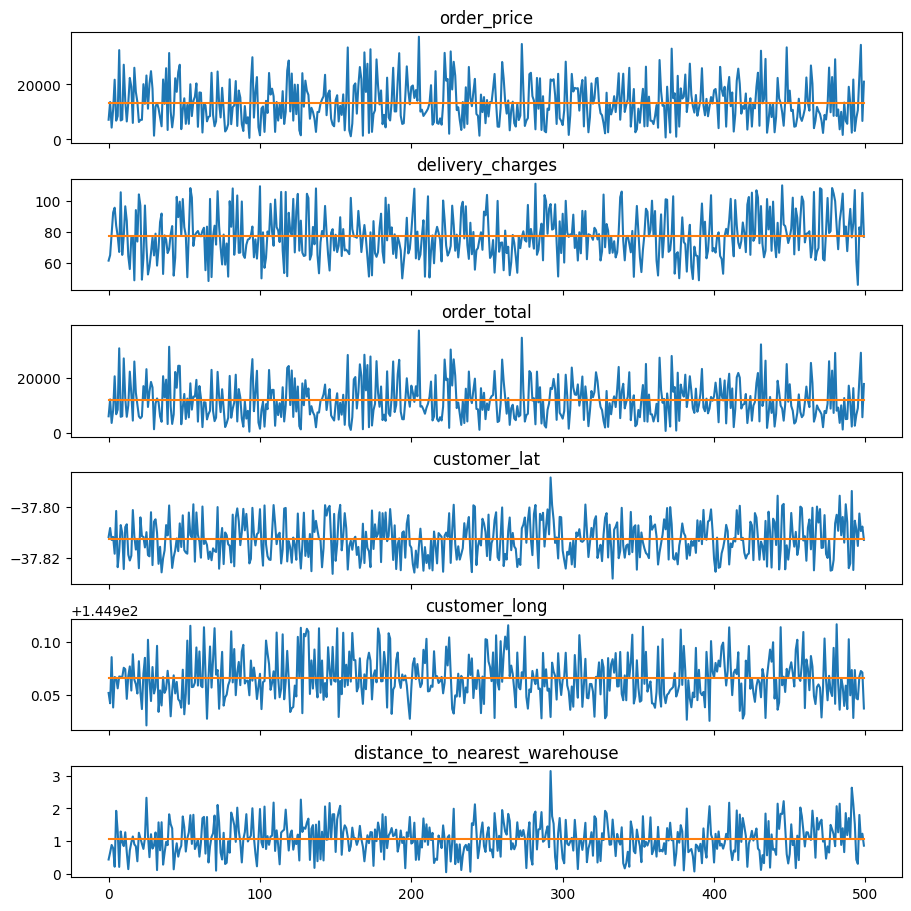

In [121]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(6, 1, figsize=(9,9), layout='constrained', sharex=True)
ax0.plot(missing_data['order_price'])
ax0.plot([0,len(missing_data)-1], [missing_data['order_price'].mean(), missing_data['order_price'].mean()])
ax0.set_title('order_price')

ax1.plot(missing_data['delivery_charges'])
ax1.plot([0,len(missing_data)-1], [missing_data['delivery_charges'].mean(), missing_data['delivery_charges'].mean()])
ax1.set_title('delivery_charges')

ax2.plot(missing_data['order_total'])
ax2.plot([0,len(missing_data)-1], [missing_data['order_total'].mean(), missing_data['order_total'].mean()])
ax2.set_title('order_total')

ax3.plot(missing_data['customer_lat'])
ax3.plot([0,len(missing_data)-1], [missing_data['customer_lat'].mean(), missing_data['customer_lat'].mean()])
ax3.set_title('customer_lat')

ax4.plot(missing_data['customer_long'])
ax4.plot([0,len(missing_data)-1], [missing_data['customer_long'].mean(), missing_data['customer_long'].mean()])
ax4.set_title('customer_long')

ax5.plot(missing_data['distance_to_nearest_warehouse'])
ax5.plot([0,len(missing_data)-1], [missing_data['distance_to_nearest_warehouse'].mean(), missing_data['distance_to_nearest_warehouse'].mean()])
ax5.set_title('distance_to_nearest_warehouse')